In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data into a Pandas DataFrame
boston_allData_df = pd.read_csv('cleaned_listings.csv')
boston_allData_df.head()

,id,name,host_id,host_acceptance_rate,host_total_listings_count,neighbourhood,latitude,longitude,property_type,room_type,...,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3781,HARBORSIDE-Walk to subway,4804,0.33,5,East Boston,42.36413,-71.02991,Entire rental unit,Entire home/apt,...,125,29,1125,4.96,5.00,4.96,5.00,4.96,4.84,4.88
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,0.99,14,Roxbury,42.32844,-71.09581,Entire guest suite,Entire home/apt,...,139,3,90,4.79,4.88,4.90,4.95,4.89,4.56,4.75
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,0.99,14,Roxbury,42.32802,-71.09387,Entire condo,Entire home/apt,...,179,3,730,4.81,4.82,4.87,4.90,4.95,4.52,4.72
3,8789,Curved Glass Studio/1bd facing Park,26988,0.46,31,Beacon Hill,42.35867,-71.06307,Entire rental unit,Entire home/apt,...,92,91,365,4.69,4.69,4.55,4.93,4.97,4.97,4.59
4,10811,"Back Bay Apt Studio-3 blocks to Pru center & ""T""",38997,0.57,29,Back Bay,42.35173,-71.08685,Entire rental unit,Entire home/apt,...,130,91,1125,4.33,4.44,4.67,4.56,4.00,5.00,4.67


In [4]:
# Count the number of property units per neighborhood
property_count = boston_allData_df['neighbourhood'].value_counts().reset_index()
property_count.columns = ['neighbourhood', 'property_count']


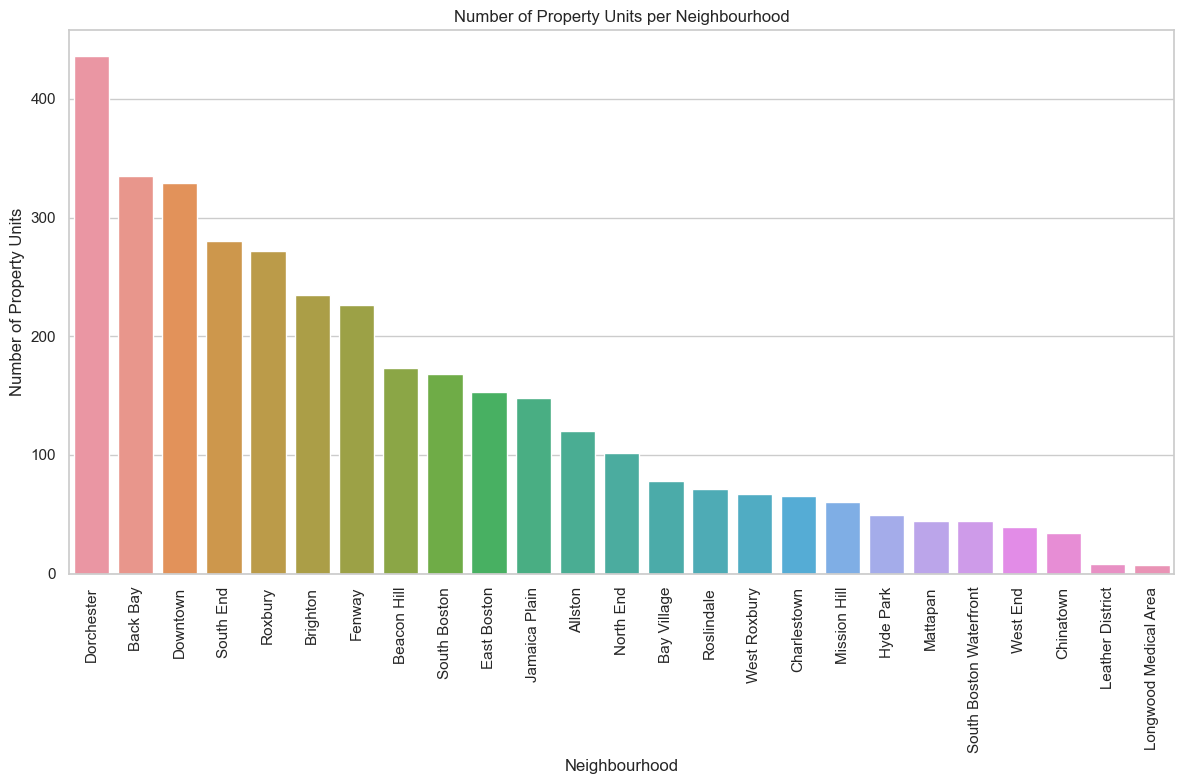

In [5]:
# Set the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='neighbourhood', y='property_count', data=property_count)
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Property Units')
plt.title('Number of Property Units per Neighbourhood')
plt.tight_layout()
plt.savefig('Units_Per_Neighborhood.png')
plt.show()

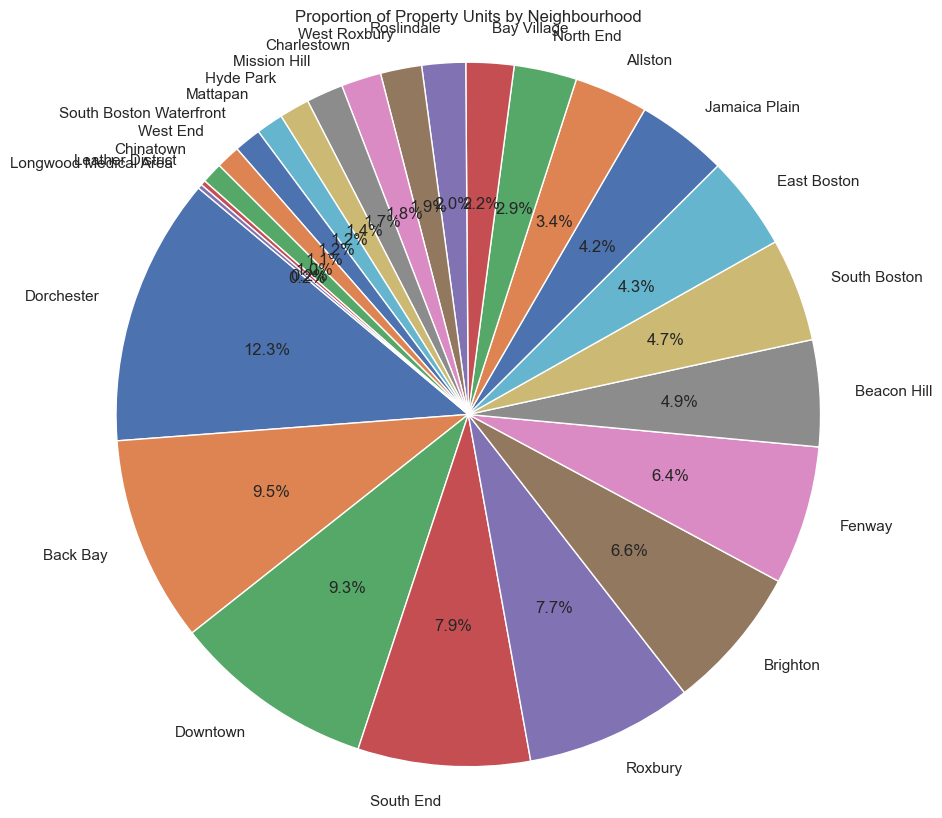

In [6]:
# Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(property_count['property_count'], labels=property_count['neighbourhood'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Property Units by Neighbourhood')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [10]:
# Count the total number of units per neighborhood
neighborhood_counts = boston_allData_df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'total_units']

# Get the top 5 neighborhoods
top_5_neighborhoods = neighborhood_counts.head(5)['neighbourhood']

In [11]:
# Filter the data for the top 5 neighborhoods
top_5_data = boston_allData_df[boston_allData_df['neighbourhood'].isin(top_5_neighborhoods)]

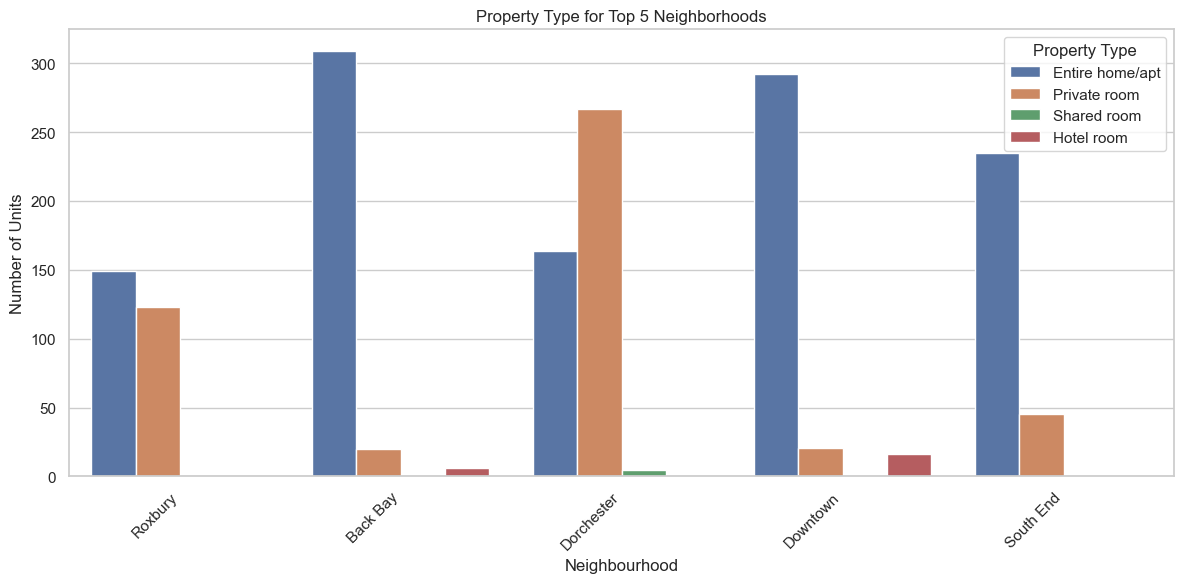

In [12]:
# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=top_5_data, x='neighbourhood', hue='room_type')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Units')
plt.title('Property Type for Top 5 Neighborhoods')
plt.legend(title='Property Type')
plt.tight_layout()
plt.savefig('Top5_Neighborhoods_RoomType.png')
plt.show()